# Setup

In [1]:
import numpy as num
import scipy.special as scis # scis.gamma(5) --> 24 == 4!
import matplotlib.pyplot as plt
import math # math.exp(), math.sqrt(), math.factorial()
import sympy as sym
import sympy.vector as symvect

sym.init_printing() # Only need to do this once per session.

In [2]:
x,y,x1,y1,x2,y2,epsilon = sym.symbols('x y x1 y1 x2 y2 epsilon')

C is our coordinate system, with basis vectors $\hat{i}$ and $\hat{j}$ (and $\hat{k}$, but we won't use that).

In [3]:
C = symvect.CoordSys3D('') # As long as we restrict ourselves to vectors involving i & j, we'll have 2D vectors.
        # We give the coordinate system no name (''), so we don't get unnecessary subscript clutter on the 
        # basis unit vectors when pretty-printed.

In [4]:
v1 = x1*C.i + y1*C.j  # Symbolic computation.
v2 = x2*C.i + y2*C.j
v1.dot(v2)

In [5]:
v2-v1

# Dot product with side's left normal

Let points $p_1$ and $p_2$ be defined as:
$$
% Each line terminated with "\\"
p_1 = (x_1, y_1) \\
p_2 = (x_2, y_2)
$$

The "left normal" of a vector $\overrightarrow{p_{1}p_{2}}$ from $p_1$ to $p_2$, $(x_{2}, y_{2}) - (x_{1}, y_{1}) = (\Delta x, \Delta y)$, is $(-\Delta y, \Delta x)$.

In [6]:
p1 = x1*C.i + y1*C.j
p2 = x2*C.i + y2*C.j
deltaY = y2-y1
deltaX = x2-x1
leftNormal = -deltaY*C.i + deltaX*C.j
leftNormal

Now we create a vector $\overrightarrow{p_{1}p}$ from $p_1$ to a test point $p$ and take its dot product with $\overrightarrow{p_{1}p_{2}}$:

In [7]:
p = x*C.i + y*C.j
p1p = p - p1
p1p

In [8]:
leftNormal.dot( p1p)

...which is obvious, but I had made the mistake of trying to expand the above expression
by hand and then simplify after cancelling some opposite-sign terms out and factoring.
I think that was doomed to failure.

Anyway, if the above expression is negative, then the test point $p$ is on the opposite side of the line segment $p_{1}p_{2}$ from $p_{1}p_{2}$'s left normal (so... it's on the right).

We see that the totologic blog post has the signs reversed (presumably because
he had the y-axis reversed for typical computer screens).

# Distance from point to side (segment)

![side-and-point sketch](side-and-point-sketch.png)

We're going to find an expression for $d^2$, the distance $d$ of the test point $p$ from the triangle side $p_{1}p_{2}$, squared.

$\overrightarrow{p_{1}p_{2}} \cdot \overrightarrow{p_{1}p} = |\overrightarrow{p_{1}p_{2}}| \times |\overrightarrow{p_{1}p}| \times \cos{\theta}$, where $\theta$ is the angle between the vectors.

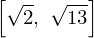

In [9]:
q1 = 1*C.i + 1*C.j
q2 = 3*C.i + 2*C.j
[q1.magnitude(), q2.magnitude()]

In [10]:
q1.dot( q2)

As you can see from above, multiplying big vectors _can_ result in big numbers.

Using the definitions of $p_1$, $p_2$, and $p$ from above, we define vectors $\overrightarrow{p_{1}p_{2}}$ and $\overrightarrow{p_{1}p}$:

In [11]:
p1p2 = p2 - p1
p1p = p - p1
p1p2.dot( p1p)

$|\overrightarrow{p_{1}p}|^2$ is the length of a hypotenuse of a **right triangle**, squared.

In [12]:
hypSqrd = p1p.magnitude()**2
hypSqrd

### On unit vectors...

A "unit vector" is a vector in the direction of some other vector, but having length 1.

For example, if we have a vector $(10,0)$ (i.e., extending along the x-axis), the unit vector in that direction is $(1,0)$.

Pretty simple, but suppose we have a vector $(2,3)$.  What is a vector pointing in the same direction but only having length 1?  We need to scale that vector back a bit, but by how much?  This is probably looking pretty obvious by now, but the length of $(2,3)$ is:

In [13]:
b = (2*C.i + 3*C.j)
b.magnitude()

and the scaling is dividing by that length:

In [14]:
(b / sym.sqrt(13)).magnitude()

So, unit vector $\hat{b}$ is

$$
\hat{b} = \frac{\vec{b}}{|\vec{b}|}
$$

So, the _projection_ of a vector $\vec{a}$ on to another vector $\vec{b}$ is a vector whose _length_ is the length of $\vec{a}$ scaled by the cosine of the angle between $\vec{a}$ and $\vec{b}$, and whose _direction_ is the same as $\hat{b}$.  In other words,

$$
\overrightarrow{a_b} = |\vec{a}| \times \cos \theta \times \hat{b}
$$

(where $\overrightarrow{a_b}$ is the projection of $\vec{a}$ onto $\vec{b}$.)

But that expression is just

$$
\vec{a} \cdot \frac{\vec{b}}{|\vec{b}|}
$$

Finally, the _length_ of the _projection_ is:

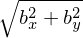

In [15]:
(a_x, a_y, b_x, b_y) = sym.symbols('a_x a_y b_x b_y')
a = a_x*C.i + a_y*C.j
b = b_x*C.i + b_y*C.j
b.magnitude()

(where $a_x$ and $a_y$ are the x- and y-components of $a$, and likewise for $b$.)

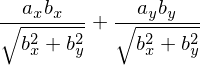

In [16]:
proj = a.dot( b / b.magnitude())
proj

Or

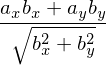

In [17]:
proj = (a.dot(b)) / b.magnitude()
proj

And, since we hate taking square roots unnecessarily when computering, if we square the above expression to get rid of the radical...

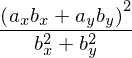

In [18]:
proj**2

### Having established the basics of projection...

One leg of the right triangle, the projection of $\overrightarrow{p_{1}p}$ onto $\overrightarrow{p_{1}p_{2}}$, has length squared equal to

$$
\frac{(\overrightarrow{p_{1}p_{2}} \cdot \overrightarrow{p_{1}p})^2}{|\overrightarrow{p_{1}p_{2}}|^2}
$$

In [19]:
p1p2Sqrd = p1p2.magnitude()**2
sym.simplify( p1p2Sqrd)

First, real quick, let's check our variables and make sure nothing's changed, inadvertently.

In [20]:
dict( p1=p1, p2=p2, p=p, p1p=p1p, p1p2=p1p2, p1p2Sqrd=p1p2Sqrd)

{'p1': x1*.i + y1*.j,
 'p2': x2*.i + y2*.j,
 'p': x*.i + y*.j,
 'p1p': (x - x1)*.i + (y - y1)*.j,
 'p1p2': (-x1 + x2)*.i + (-y1 + y2)*.j,
 'p1p2Sqrd': (-x1 + x2)**2 + (-y1 + y2)**2}

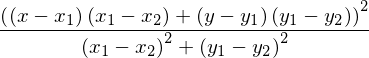

In [21]:
projSqrd = (p1p.dot( p1p2)**2 / p1p2Sqrd)
sym.simplify( projSqrd)

Length $d$ of remaining leg of triangle is unknown, *but* Pythagoras tells us 

$$
|\overrightarrow{p_{1}p}|^2 - (\overrightarrow{p_{1}p} \cdot \overrightarrow{p_{1}p_{2}})^2 / |\overrightarrow{p_{1}p_{2}}|^2 = d^2
$$

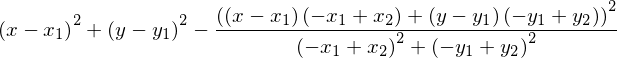

In [22]:
dSqrd = hypSqrd - projSqrd
dSqrd

## A little exercise checking correctness so far

If we set up a simple test of a vertical line of length 2 (from (0,-1) to (0,1)), and a test point on the
x-axis ($y=0$) being brought to the y-axis (x -> 0), then the distance of the test point from the line
segment should be exactly $x$. And it is (don't forget we're calculating distance SQUARED):

In [23]:
dSqrd.subs(x1,0).subs(y1,-1).subs(x2,0).subs(y2,1).subs(y,0)

If our test point is at $(1,y)$ and we're projecting onto a vertical line on the y-axis, it doesn't matter
what our $x$ value is, because only the $y$ value determines what the projection will be. And if $y$ is
larger than the length of our (vertical, in this example) "triangle side" $p_{1}p_{2}$, then so be it, the projection will also be large.

In [24]:
projSqrd.subs(x1,0).subs(y1,0).subs(x2,0).subs(y2,2).subs(x,1)

In [25]:
projSqrd.subs(x1,0).subs(y1,0).subs(x2,0).subs(y2,2).subs(x,1).subs(y,10)

So, we have to check if the projection is larger than $|\overrightarrow{p_{1}p_{2}}|$, and, if so, we know that the test vector $\overrightarrow{p_{1}p}$ is actually LONGER than the triangle side, so we truncate the testing against $\epsilon^2$ by simply computing the distance from the test point $p$ to $p_2$, the other ("far") end of the triangle side.

That's not described in this document, but it is in the code.

## Reducing math operations

Ideally, we'd like to keep the number of multiplications and divisions to a minimum, and the number square roots and other transcendental functions to zero, in order to make the code fastfastfast.  (Well, it's gonna be Haskell, but, ya know... the principle of the thing.)

(Note on divisions: any time a division by the difference of two numbers occurs, that's a danger sign.  If the two numbers are almost equal in value, you're dividing by a very small value (yielding a very large value), and if there are errors in the two numbers you're subtracting (say, because they're just digital approximations of real values) you can wind up with very big errors in your result.  Avoid dividing by differences, if you can.  Or maybe find a way to throw a $+1$ in the denominator.)

So, our distance-to-side code looks like this:

   1. If dot product is negative, angle is obtuse, projection will be off side near $p_1$, and we might as well just calculate distance to $p_1$.
   2. If the projection is longer than $p_{1}p_{2}$, the same logic leads us to calculating the distance to $p_2$.  Since calculating the length of $p_{1}p_{2}$ involves dividing by a square root, let's try to avoid that.  We're just comparing two numbers for greater-than, anyway.
   3. Otherwise, yeah, go ahead and run the full algorithm, but _remember_: we just want to know if the distance is within epsilon ($\epsilon$), since we're only running this distance-to-side algorithm if previously-attempted algorithms have _failed_, declaring this point to be _outside_ the triangle.
   
Here's our code at this moment, before we start verifying/improving it, along with a monstrous chunk of commented-out copied from the totologic blog post:

```haskell
-- | Computes square of distance from given point to given side.
distanceSqrdPointToSide :: Point -> Point -> Point -> Double
distanceSqrdPointToSide
  (Point _ (x,y))               -- ^ The point under test
  (Point _ (x1,y1))             -- ^ Starting point of side
  (Point _ (x2,y2))             -- ^ Ending point of side
  = let p1p2LengthSqrd = (x2-x1)*(x2-x1) + (y2-y1)*(y2-y1)
        dotProduct = ((x-x1)*(x2-x1) + (y-y1)*(y2-y1)) / p1p2LengthSqrd
        pp1LengthSqrd = (x1 - x)*(x1 - x) + (y1 - y)*(y1 - y)
    in
      if dotProduct < 0       then pp1LengthSqrd -- Angle > 90°, closest point of side IS p1
      else if dotProduct <= 1 then pp1LengthSqrd - dotProduct * dotProduct * p1p2LengthSqrd
                              else (x - x2)*(x - x2) + (y - y2)*(y - y2)

      -- TODO: not at ALL sure this is correct.

{-
    function distanceSquarePointToSegment(x1, y1, x2, y2, x, y:Number):Number
    {
     var p1_p2_squareLength:Number = (x2 - x1)*(x2 - x1) + (y2 - y1)*(y2 - y1);
     var dotProduct:Number = ((x - x1)*(x2 - x1) + (y - y1)*(y2 - y1)) / p1_p2_squareLength;
     if ( dotProduct < 0 )
     {
      return (x - x1)*(x - x1) + (y - y1)*(y - y1);
     }
     else if ( dotProduct <= 1 )
     {
      var p_p1_squareLength:Number = (x1 - x)*(x1 - x) + (y1 - y)*(y1 - y);
      return p_p1_squareLength - dotProduct * dotProduct * p1_p2_squareLength;
     }
     else
     {
      return (x - x2)*(x - x2) + (y - y2)*(y - y2);
     }
    }
-}
```

```p1p2LengthSqrd``` looks right.  The signs are reversed, but who cares, because it's going to be squared.

```dotProduct``` needs to change, if possible, because we're dividing (bad) by differences (real bad).  How is it used?

  1. It's compared to 0 and 1.  Easy fix: compare to 0 and the thing it's divided by.
  2. It's multiplied by the thing it's divided by.  Duh, cancel those terms out.  
  
But first, make sure that math is correct.  We're checking to see that the projection is shorter than the side.  ```p1pLengthSqrd``` is the _hypotenuse_ length, and we want to subtract the _length_ of the projection from it, to get $d^2$, the length of the unknown side.

In that calculation, why are we multiplying by ```p1p2LengthSqrd```?

Let's multiply ```dSqrd``` through by ```p1p2Sqrd```.

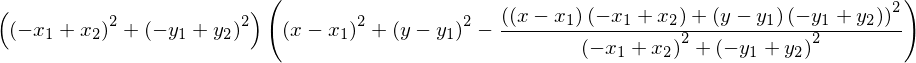

In [26]:
dSqrd * p1p2Sqrd

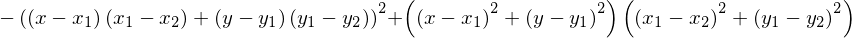

In [27]:
sym.simplify( dSqrd * p1p2Sqrd)

And multiply $\epsilon^2$ by the same figure (```p1p2Sqrd```) and compare those two values.  Means we need to pass $\epsilon$ as an argument to the distance function.  And/or rename it?  ```withinEpsilonOf```, maybe?